In [15]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [105]:
from proj1_helpers import *
from toolbox import *
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, x, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=True)
num_samples = len(y)
tx = np.c_[np.ones(num_samples), x]

[ True  True  True ...,  True  True  True]


## Do your thing crazy machine learning thing here :) ...

(1369,)


C:\Users\Romain\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2569: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Romain\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2570: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(420.39084039143768,
 array([ -3.74926286e-06,  -4.63773039e-04,  -1.31388963e-04,
         -3.01687196e-04,  -3.87211678e-04,  -9.15938116e-06,
         -1.34806192e-03,   3.32916119e-06,  -7.68902743e-06,
         -9.63221064e-05,  -9.92563732e-04,  -5.29925896e-06,
         -2.37870144e-06,  -1.82383928e-06,  -1.75075868e-04,
          1.69317805e-07,   6.34629053e-08,  -1.90195555e-04,
          3.22942830e-07,  -3.18507341e-07,  -1.83090879e-04,
         -6.66476054e-07,  -1.19265648e-03,  -8.53474642e-06,
         -3.64850509e-04,  -1.59695050e-07,   3.49968674e-07,
         -2.01796924e-04,   4.58911177e-08,   8.09458762e-07,
         -6.27292217e-04]))

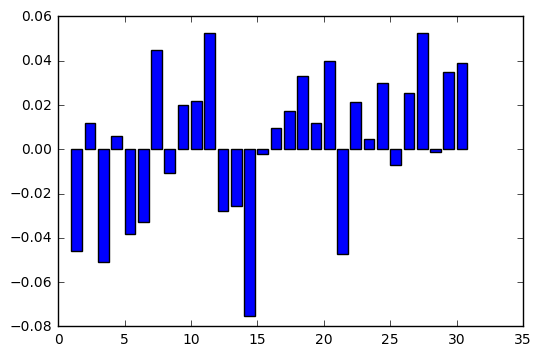

In [135]:
def plot_feature_to_output_correlations(tx, y):
    feature_count = tx.shape[1]

    corrs = np.zeros(feature_count)
    for i in range(feature_count):
        x = tx[:, i]
        corrs[i] = np.corrcoef(x, y)[0][1]

    fig, ax = plt.subplots()
    width = 0.5

    ax.bar(np.arange(feature_count), corrs)
    
def logistic_regression(y, tx, initial_w, gamma, max_iters):
    """Logistic regression"""
    def logistfun(x):
        exp = np.exp(x)
        return exp / (1 + exp)
    
    def loss(y, tx, w):
        res = 0
        for n in range(len(y)):
            txn_t_x_w = tx[n].T @ w
            res += np.log(1 + np.exp(txn_t_x_w)) - y[n] * txn_t_x_w
        return np.abs(res)
    
    def grad(y, tx, w):
        return tx.T @ (logistfun(tx @ w) - y)
    
    return gradient_descent(y, tx, initial_w, gamma, max_iters, loss, grad)

for i in range(feature_count):
    idxes = (tx[:,i] != -999)
    tx = tx[idxes]
    y = y[idxes]

print(y.shape)
    
plot_feature_to_output_correlations(tx, y)
logistic_regression(y, tx, np.zeros(tx.shape[1]), 0.00000000001, 400)

## Generate predictions and save ouput in csv format for submission:

In [10]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)